importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob
import re
from skimage.io import imread

import keras

dataset generation

In [ ]:
overview_df = pd.read_csv('/content/overview.csv')
overview_df.columns = ['idx']+list(overview_df.columns[1:])
overview_df['Contrast'] = overview_df['Contrast'].map(lambda x: 'Contrast' if x else 'No Contrast')
overview_df.sample(3)

,idx,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
67,67,60,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,67,ID_0067_AGE_0060_CONTRAST_0_CT.tif,ID_0067_AGE_0060_CONTRAST_0_CT.dcm
63,63,73,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,63,ID_0063_AGE_0073_CONTRAST_0_CT.tif,ID_0063_AGE_0073_CONTRAST_0_CT.dcm
83,83,82,No Contrast,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,83,ID_0083_AGE_0082_CONTRAST_0_CT.tif,ID_0083_AGE_0082_CONTRAST_0_CT.dcm


In [ ]:
import zipfile
extracted_dir_path = 'kaggle/input'
!mkdir -p extracted_dir_path
zip_file_path = '/content/archive.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
import mimetypes

file_path = '/content/archive (2).zip'
mime_type, encoding = mimetypes.guess_type(file_path)

In [ ]:
import zipfile
import os

uploaded_zip_file = '/content/archive.zip'
extracted_dir_path = '/content/extracted/'
os.makedirs(extracted_dir_path, exist_ok=True)

with zipfile.ZipFile(uploaded_zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print(f"Successfully extracted to: {extracted_dir_path}")


Successfully extracted to: /content/extracted/


In [ ]:
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/extracted/archive'):
    print(dirname,"______")
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/extracted/archive ______
/content/extracted/archive/full_archive.npz
/content/extracted/archive/overview.csv
/content/extracted/archive/dicom_dir ______
/content/extracted/archive/dicom_dir/ID_0026_AGE_0070_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0097_AGE_0060_CONTRAST_0_CT.dcm
/content/extracted/archive/dicom_dir/ID_0020_AGE_0066_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0086_AGE_0073_CONTRAST_0_CT.dcm
/content/extracted/archive/dicom_dir/ID_0078_AGE_0066_CONTRAST_0_CT.dcm
/content/extracted/archive/dicom_dir/ID_0033_AGE_0071_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0085_AGE_0067_CONTRAST_0_CT.dcm
/content/extracted/archive/dicom_dir/ID_0072_AGE_0060_CONTRAST_0_CT.dcm
/content/extracted/archive/dicom_dir/ID_0041_AGE_0045_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0043_AGE_0069_CONTRAST_1_CT.dcm
/content/extracted/archive/dicom_dir/ID_0027_A

Exploratory data analysis

In [ ]:
IS_LOCAL = False
if(IS_LOCAL):
    PATH="../input/siim-medical-image/"
else:
    PATH="/content/extracted/archive"
print(os.listdir(PATH))
overview = pd.read_csv(os.path.join(PATH,"overview.csv"))
overview.head()

['dicom_dir', 'full_archive.npz', 'overview.csv', 'tiff_images']


,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [ ]:
len(overview)

100

In [ ]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

<ipython-input-20-b53b74832c80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(overview['Age'])


<Axes: xlabel='Age', ylabel='Density'>

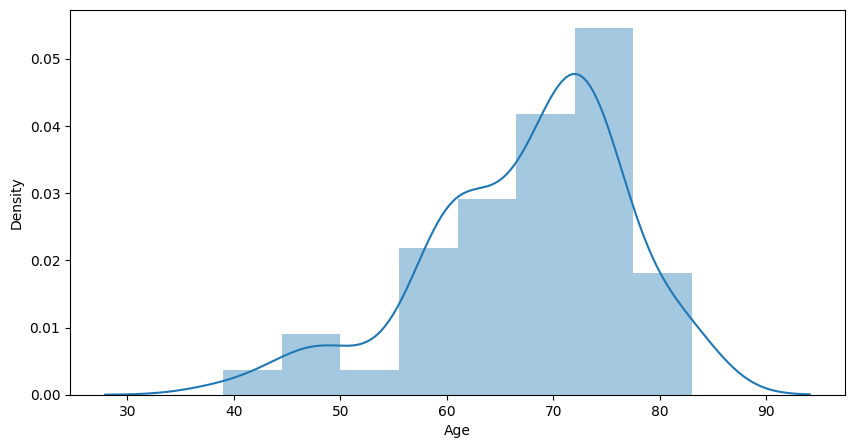

In [ ]:
# plotting
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


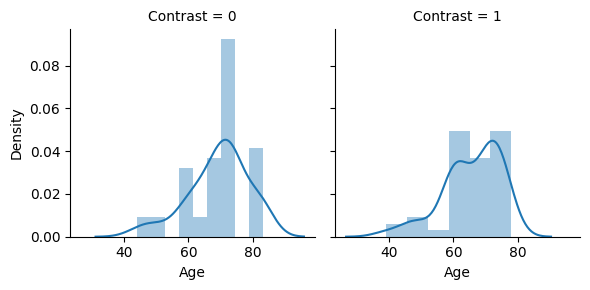

In [ ]:
g = sns.FacetGrid(overview, col="Contrast")
g = g.map(sns.distplot, "Age")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


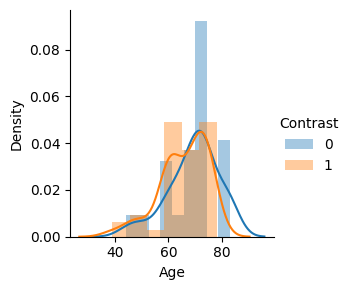

In [ ]:
g = sns.FacetGrid(overview, hue="Contrast", legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

Reading Image Files

In [ ]:
BASE_IMG_PATH='/content/extracted/archive'
all_images_list = glob(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list[:5]
print(all_images_list)

['/content/extracted/archive/tiff_images/ID_0019_AGE_0070_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0049_AGE_0061_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0032_AGE_0061_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0056_AGE_0083_CONTRAST_0_CT.tif', '/content/extracted/archive/tiff_images/ID_0047_AGE_0069_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0076_AGE_0068_CONTRAST_0_CT.tif', '/content/extracted/archive/tiff_images/ID_0062_AGE_0067_CONTRAST_0_CT.tif', '/content/extracted/archive/tiff_images/ID_0045_AGE_0074_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0013_AGE_0060_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0016_AGE_0063_CONTRAST_1_CT.tif', '/content/extracted/archive/tiff_images/ID_0070_AGE_0074_CONTRAST_0_CT.tif', '/content/extracted/archive/tiff_images/ID_0095_AGE_0071_CONTRAST_0_CT.tif', '/content/extracted/archive/tiff_images/ID_0006_AGE_0075_CONTRAST_1_CT.tif'

 - np.expand_dims -> Expand the shape of an array.
  - Insert a new axis, corresponding to a given position in the array shape.

In [ ]:
imread(all_images_list[0]).shape

(512, 512)

In [ ]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [ ]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]

array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [ ]:
np.expand_dims(imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

In [ ]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)

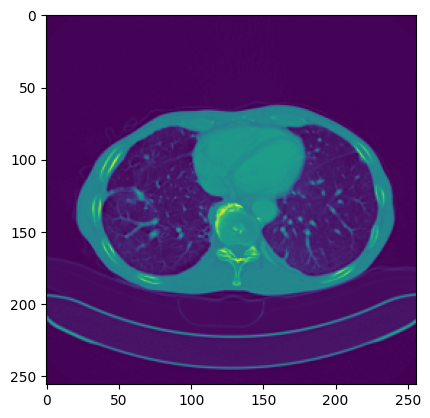

In [ ]:
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [ ]:
check_contrast = re.compile(r'ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [ ]:
label_list = pd.DataFrame(label,id_list)

In [ ]:
label_list.head()

,0
0019,1
0049,1
0032,1
0056,0
0047,1


In [ ]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [ ]:
len(images)

100

Spliting Dataset to Train, Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)

In [ ]:
# reshaping the image
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [ ]:
n_train,depth, width, height

(90, 1, 256, 256)

In [ ]:
input_shape = (width,height,depth)

In [ ]:
input_shape

(256, 256, 1)

In [ ]:
# training data
input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [ ]:
# testing data
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [ ]:
output_train = keras.utils.to_categorical(y_train, 2)
output_test = keras.utils.to_categorical(y_test, 2)
output_train[5]

array([1., 0.], dtype=float32)

In [ ]:
input_train.shape

(90, 256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
batch_size = 20
epochs = 40

## Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 50)      1300      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 81, 81, 30)        24030     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 40, 30)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 48000)             0         
                                                                 
 dense (Dense)               (None, 2)                 9

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Training the model

In [ ]:
history = model2.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/40
5/5 [==============================] - 15s 3s/step - loss: 0.7558 - accuracy: 0.6000 - val_loss: 0.6434 - val_accuracy: 0.6000
Epoch 2/40
5/5 [==============================] - 16s 4s/step - loss: 0.6957 - accuracy: 0.5778 - val_loss: 0.7342 - val_accuracy: 0.4000
Epoch 3/40
5/5 [==============================] - 9s 2s/step - loss: 0.6168 - accuracy: 0.6000 - val_loss: 0.6362 - val_accuracy: 0.7000
Epoch 4/40
5/5 [==============================] - 10s 2s/step - loss: 0.4793 - accuracy: 0.8444 - val_loss: 0.5365 - val_accuracy: 0.8000
Epoch 5/40
5/5 [==============================] - 10s 2s/step - loss: 0.3351 - accuracy: 0.8889 - val_loss: 0.3394 - val_accuracy: 0.9000
Epoch 6/40
5/5 [==============================] - 9s 2s/step - loss: 0.2021 - accuracy: 0.9222 - val_loss: 0.6208 - val_accuracy: 0.9000
Epoch 7/40
5/5 [==============================] - 9s 2s/step - loss: 0.1145 - accuracy: 0.9778 - val_loss: 0.5730 - val_accuracy: 0.9000
Epoch 8/40
5/5 [=====================

Prediction

In [ ]:
score = model2.evaluate(input_test, output_test, verbose=0)
score

[1.1789953708648682, 0.8999999761581421]

In [ ]:
model2.predict(input_test)

1/1 [==============================] - 0s 350ms/step


array([[1.1062919e-05, 9.9998885e-01],
       [1.9547906e-06, 9.9999803e-01],
       [1.1517607e-05, 9.9998838e-01],
       [6.8747509e-01, 3.1252494e-01],
       [2.2539217e-11, 9.9999994e-01],
       [9.9935895e-01, 6.4101303e-04],
       [5.0627702e-04, 9.9949366e-01],
       [9.9787217e-01, 2.1277952e-03],
       [9.9997950e-01, 2.0526650e-05],
       [9.9999964e-01, 3.7840800e-07]], dtype=float32)

In [ ]:
# saving the model
model2.save('/content/ct_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Loading saved model
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('/content/ct_model.h5')

Model parameters

In [ ]:
all_weights = []
for layer in model3.layers:
    if hasattr(layer, 'get_weights'):
        weights = layer.get_weights()
        all_weights.append(weights)

for i, weights in enumerate(all_weights):
    print(f"Layer {i + 1} - {model3.layers[i].name}")
    for j, w in enumerate(weights):
        print(f"   Weights {j + 1}: {w.shape}")

Layer 1 - conv2d
   Weights 1: (5, 5, 1, 50)
   Weights 2: (50,)
Layer 2 - max_pooling2d
Layer 3 - conv2d_1
   Weights 1: (4, 4, 50, 30)
   Weights 2: (30,)
Layer 4 - max_pooling2d_1
Layer 5 - flatten
Layer 6 - dense
   Weights 1: (48000, 2)
   Weights 2: (2,)


Extracting weights, biases from each layer

In [ ]:
conv1_weights, conv1_biases = model3.layers[0].get_weights()
conv2_weights, conv2_biases = model3.layers[2].get_weights()
dense1_weights, dense1_biases = model3.layers[5].get_weights()

In [ ]:
# Flattening
conv1_weights_flattened_list = conv1_weights.flatten().tolist()
conv2_weights_flattened_list = conv2_weights.flatten().tolist()
dense1_weights_flattened_list = dense1_weights.flatten().tolist()

# Converting biases to lists
conv1_biases_list = conv1_biases.tolist()
conv2_biases_list = conv2_biases.tolist()
dense1_biases_list = dense1_biases.tolist()

Quantization

In [ ]:
import torch

def absmax_quantize_list(weights_list):
    X = torch.tensor(weights_list, dtype=torch.float32)
    scale = 127 / torch.max(torch.abs(X))

    # Quantize
    X_quant = (scale * X).round()

    # Dequantize
    X_dequant = X_quant / scale

    quantized_list = X_quant.to(torch.int8).tolist()
    return quantized_list, X_dequant.tolist()

In [ ]:
new_conv_weights = []
for j in range(0, 50):
  for i in range(0, 1250, 50):
    new_conv_weights.append(conv1_weights_flattened_list[j+i])

In [ ]:
len(new_conv_weights)

24000

In [ ]:
# flattening the image
new_conv_weights = []
for num_fil in range(0,30):
  for dep in range(0,50):
    for row in range(0,4):
      for col in range(0,4):
        new_conv_weights.append(conv2_weights[row][col][dep][num_fil])

In [ ]:
weights_list = new_conv_weights
print(len(weights_list))

quantized_weights, dequantized_weights = absmax_quantize_list(weights_list)

print("\nAbsmax quantized weights:")
print(len(quantized_weights))

with open('quantized_conv2_weights.txt', 'w') as f:
  f.write(str(quantized_weights))

24000

Absmax quantized weights:
24000


In [ ]:
def flatten(image, h, w, d):
  flattenedImage = []
  for k in range(0, d):
    for i in range(0, h):
      for j in range(0, w):
        flattenedImage.append(image[i][j])
  return flattenedImage

Taking some samples

In [ ]:
test_images = []
true_labels = []
tdata = []

for idx in range(0, 10):
    tdata.append(input_test[idx])
    reshaped_image = input_test[idx]
    x = (flatten(reshaped_image, 256, 256, 1))
    test_images.append(np.concatenate(x).flatten().tolist())
    # print(flatten(reshaped_image, 256, 256, 1))
    # print(test_images[0])
    # print(np.argmax(np.array(output_test[idx])))
    # break
    true_labels.append(np.argmax(np.array(output_test[idx])))

flattened_test_images = [item for sublist in test_images for item in sublist]

In [ ]:
print(input_test[0])

In [ ]:
# with open('test_images.txt', 'w') as f:
#   f.write(str(flattened_test_images))
with open('true_labels.txt', 'w') as f:
  f.write(str(true_labels))

Accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(input_test,output_test)
print(f'Accuracy: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 1s 1s/step - loss: 1.5443e-04 - accuracy: 1.0000
Accuracy: 100.00%


Time

In [ ]:
import time
import numpy as np

start_time = time.time()
predictions = model.predict(input_test)
end_time = time.time()
inference_time = []
inference_time.append(end_time - start_time)
print(f"Inference time: {inference_time[0]} seconds")

1/1 [==============================] - 1s 697ms/step
Inference time: 0.7747437953948975 seconds
